## Recrutamento do Campus 

Fatores acadêmicos e de empregabilidade que influenciam a colocação. 

### Sobre o dataset

Ele contém informações detalhadas sobre o desempenho acadêmico dos estudantes, suas atividades extracurriculares e os resultados de colocação (se foram colocados em um emprego ou não

### Colunas

1. sl_no (Número de Série) - É um identificador único para cada aluno no dataset. Serve como uma chave primária e é usado apenas para diferenciar cada entrada. Não tem impacto direto na análise ou nos modelos.

2. ssc_p (Percentual no SSC) - Representa o percentual de notas obtidas pelo estudante no Secondary School Certificate (SSC), que corresponde ao ensino secundário. É uma medida do desempenho acadêmico no ensino médio, que pode ser usado para verificar sua influência na colocação de empregos.

3. ssc_b (Tipo de Conselho do SSC) - Indica o tipo de conselho (board) no qual o estudante completou o SSC. Geralmente, as categorias são:
   
    * Central: Refere-se a conselhos nacionais, como o CBSE na Índia.
    * Outros: Refere-se a conselhos estaduais ou regionais.
    
#####
4. hsc_p (Percentual no HSC): Percentual de notas obtidas pelo estudante no Higher Secondary Certificate (HSC), que corresponde ao ensino médio.

5. hsc_b (Tipo de Conselho do HSC) - Similar ao ssc_b, mas para o HSC. Indica se o aluno estudou em um conselho central ou em outro conselho durante o ensino médio superior.

6. hsc_s (Área de Especialização no HSC) - Representa a especialização ou área de estudo escolhida pelo aluno no HSC. As categorias comuns são

    * Artes 
    * Commerce: Comércio.
    * Science: Ciências.
      
#####
7. degree_p (Percentual na Graduação) - Percentual de notas obtidas pelo estudante no curso de graduação. É uma métrica importante do desempenho acadêmico na graduação e pode estar correlacionada com as chances de colocação.

8. degree_t (Tipo de Curso de Graduação) - Indica a área de estudo ou tipo de curso durante a graduação. As categorias comuns incluem:
    * Sci&Tech: Ciências e Tecnologia.
    * Comm&Mgmt: Comércio e Gestão.
    * Others: Outras áreas.
      
#####
9. workex (Experiência de Trabalho) - Um atributo binário que indica se o estudante tem experiência de trabalho anterior. Os valores possíveis são:
Yes: Tem experiência de trabalho.
No: Não tem experiência de trabalho.

10. etest_p (Percentual no Teste de Empregabilidade) - Percentual de notas obtidas pelo estudante em um teste de empregabilidade, que geralmente avalia habilidades como raciocínio lógico, habilidades verbais e numéricas.

11. specialisation (Especialização no MBA) - Indica a especialização do aluno durante o curso de MBA. As categorias são:
    * Mkt&Fin: Marketing e Finanças.
    * Mkt&HR: Marketing e Recursos Humanos.
      
#####
12. mba_p (Percentual no MBA) - Percentual de notas obtidas pelo estudante no curso de MBA. Assim como as outras métricas de desempenho, pode ser correlacionado com as oportunidades de emprego.

13. status (Status de Colocação) - Um atributo binário que indica se o estudante foi colocado em um emprego após a graduação. Os valores possíveis são:
    * Placed: Foi colocado em um emprego.
    * Not Placed: Não foi colocado em um emprego.
#####
14. salary (Salário) - Salário oferecido ao estudante em sua colocação. Esta coluna só é preenchida se o valor na coluna status for "Placed".

15. gender (Gênero) - Gênero do estudante. Geralmente, os valores possíveis são:
    * M: Masculino.
    * F: Feminino.


1. Qual fator influenciou um candidato a ser colocado?

In [64]:
# Importando as bibliotecas de análise de dados
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Models from sklearn

from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from skopt import BayesSearchCV
from skopt.space import Real, Categorical, Integer

sns.set_style("darkgrid")

In [2]:
dados = pd.read_csv('Placement_Data_Full_Class.csv')
dados

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0
211,212,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0
212,213,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0
213,214,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,204000.0


In [3]:
dados[['degree_p', 'degree_t']]

,degree_p,degree_t
0,58.00,Sci&Tech
1,77.48,Sci&Tech
2,64.00,Comm&Mgmt
3,52.00,Sci&Tech
4,73.30,Comm&Mgmt
...,...,...
210,77.60,Comm&Mgmt
211,72.00,Sci&Tech
212,73.00,Comm&Mgmt
213,58.00,Comm&Mgmt


In [4]:
dados.isnull().sum()

sl_no              0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

In [5]:
dados['status']

0          Placed
1          Placed
2          Placed
3      Not Placed
4          Placed
          ...    
210        Placed
211        Placed
212        Placed
213        Placed
214    Not Placed
Name: status, Length: 215, dtype: object

In [6]:
dados

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0
211,212,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0
212,213,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0
213,214,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,204000.0


### Criaremos uma coluna Target com os valores 0 e 1, pois o computador entender melhor assim, usaremos a biblioteca numpy para fazer esse processo. Ao final iremos remover a coluna status


In [7]:
dados['target'] = np.where(dados['status'] == 'Placed', 0, 1)

In [8]:
dados['degree_t'].value_counts()

degree_t
Comm&Mgmt    145
Sci&Tech      59
Others        11
Name: count, dtype: int64

In [9]:
dados = dados.drop('status', axis = 1)

In [10]:
dados['hsc_b'].value_counts()

hsc_b
Others     131
Central     84
Name: count, dtype: int64

### Mudaremos também os valores do workex para 0 caso seja 'Yes' e 1 para 'No'

In [11]:
dados['workex'] = np.where(dados['workex'] == 'Yes',0, 1)

In [12]:
dados['gender'].value_counts()

gender
M    139
F     76
Name: count, dtype: int64

In [13]:
dados

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,salary,target
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,1,55.0,Mkt&HR,58.80,270000.0,0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,0,86.5,Mkt&Fin,66.28,200000.0,0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,1,75.0,Mkt&Fin,57.80,250000.0,0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,1,66.0,Mkt&HR,59.43,NaN,1
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,1,96.8,Mkt&Fin,55.50,425000.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,1,91.0,Mkt&Fin,74.49,400000.0,0
211,212,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,1,74.0,Mkt&Fin,53.62,275000.0,0
212,213,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,0,59.0,Mkt&Fin,69.72,295000.0,0
213,214,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,1,70.0,Mkt&HR,60.23,204000.0,0


In [14]:
dados['degree_t'].value_counts()

degree_t
Comm&Mgmt    145
Sci&Tech      59
Others        11
Name: count, dtype: int64

### Análise Exploratória

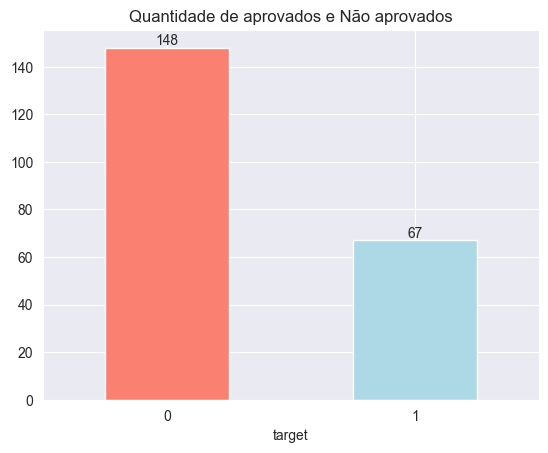

In [15]:
ax = dados['target'].value_counts().plot(kind = "bar", color = ["salmon", "lightblue"])
ax.bar_label(ax.containers[0], label_type='edge')
plt.xticks(rotation=-360);
plt.title('Quantidade de aprovados e Não aprovados');

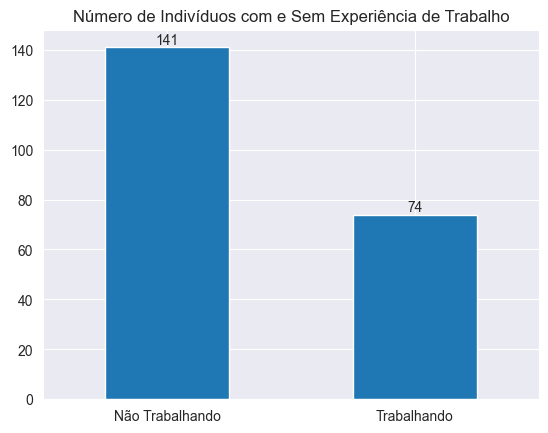

In [16]:
ax = dados['workex'].value_counts().plot(kind= "bar")
ax.bar_label(ax.containers[0], label_type='edge')
ax.set_xticklabels(['Não Trabalhando', 'Trabalhando'], rotation=0)
ax.set_xlabel('')
plt.title('Número de Indivíduos com e Sem Experiência de Trabalho');
plt.xticks(rotation=-360);

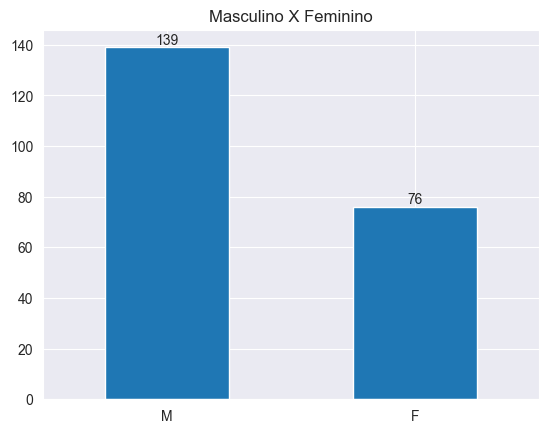

In [17]:
ax = dados['gender'].value_counts().plot(kind = "bar")
ax.bar_label(ax.containers[0], label_type='edge')
ax.set_xlabel('')
plt.title('Masculino X Feminino')
plt.xticks(rotation = -360)
plt.show()

### Podemos ver que o sexo masculino é o mais aprovado nas empresas. Porém, ele também é o que mais é recusado em relação ao seu oposto. Isso é devido por conta que existe mais pessoas do sexo masculino

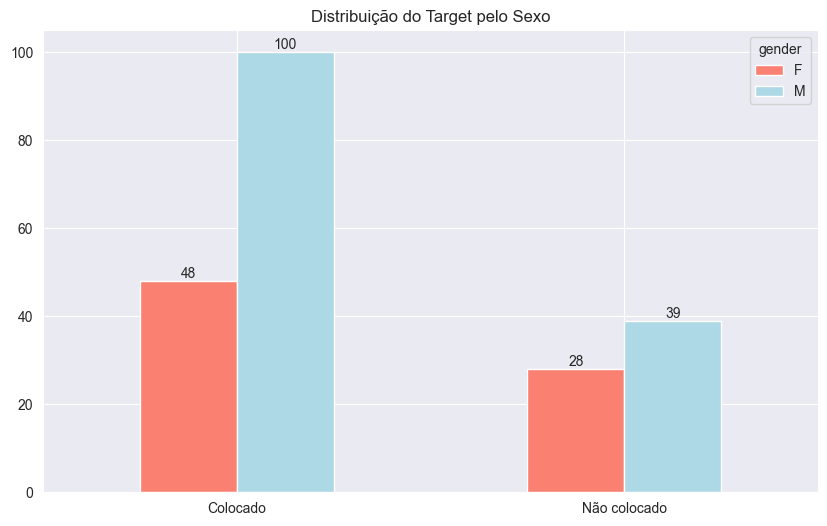

In [18]:
ax = pd.crosstab(dados.target, dados.gender).plot(kind = "bar", figsize = (10, 6), color = ["salmon", "lightblue"])
ax.bar_label(ax.containers[0], label_type='edge')
ax.bar_label(ax.containers[1], label_type='edge')

ax.set_xticklabels(['Colocado', 'Não colocado'], rotation=0)
ax.set_xlabel('')
plt.xticks(rotation=-360);
plt.title('Distribuição do Target pelo Sexo');

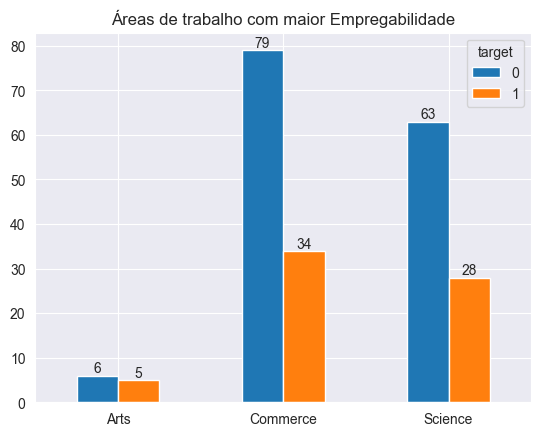

In [19]:
maior_empregabilidade = dados.groupby(['hsc_s', 'target']).size().unstack(fill_value =0)
ax = maior_empregabilidade.plot(kind='bar')

#Colocando valores nas barras
ax.bar_label(ax.containers[0], label_type='edge')
ax.bar_label(ax.containers[1], label_type='edge')

plt.xticks(rotation = 360)
plt.title('Áreas de trabalho com maior Empregabilidade')
plt.xlabel('')
plt.show()

In [20]:
dados

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,salary,target
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,1,55.0,Mkt&HR,58.80,270000.0,0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,0,86.5,Mkt&Fin,66.28,200000.0,0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,1,75.0,Mkt&Fin,57.80,250000.0,0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,1,66.0,Mkt&HR,59.43,NaN,1
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,1,96.8,Mkt&Fin,55.50,425000.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,1,91.0,Mkt&Fin,74.49,400000.0,0
211,212,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,1,74.0,Mkt&Fin,53.62,275000.0,0
212,213,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,0,59.0,Mkt&Fin,69.72,295000.0,0
213,214,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,1,70.0,Mkt&HR,60.23,204000.0,0


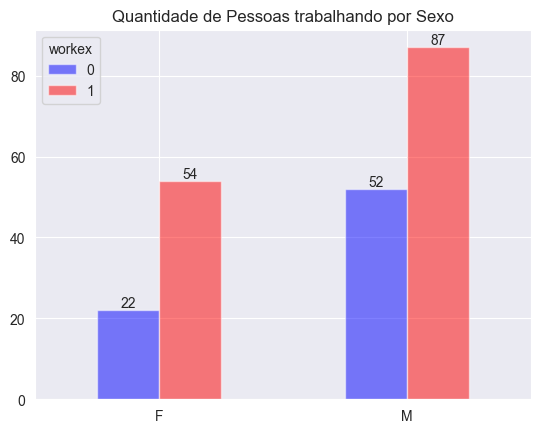

In [21]:
trabalhando_agrupado = dados.groupby(['gender', 'workex']).size().unstack(fill_value = 0)
ax = trabalhando_agrupado.plot(kind = 'bar', color = ["blue", "red"], alpha = 0.5)

ax.bar_label(ax.containers[0], label_type='edge')
ax.bar_label(ax.containers[1], label_type='edge')
ax.set_xlabel('')
plt.xticks(rotation = -360)
plt.title('Quantidade de Pessoas trabalhando por Sexo')
plt.show()

In [22]:
dados.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,salary,target
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,1,55.0,Mkt&HR,58.80,270000.0,0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,0,86.5,Mkt&Fin,66.28,200000.0,0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,1,75.0,Mkt&Fin,57.80,250000.0,0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,1,66.0,Mkt&HR,59.43,NaN,1
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,1,96.8,Mkt&Fin,55.50,425000.0,0


### Problema de multicolinearidade

In [23]:
dados[dados['target'] == 1].salary

3     NaN
5     NaN
6     NaN
9     NaN
12    NaN
       ..
198   NaN
201   NaN
206   NaN
208   NaN
214   NaN
Name: salary, Length: 67, dtype: float64

Durante a análise dos dados, identificamos que a coluna "salário" estava nula para a maioria dos indivíduos que não foram selecionados no dataset. Este padrão de valores nulos pode gerar problemas de multicolinearidade, impactando negativamente a performance e a interpretação dos modelos de machine learning.

Para evitar problemas associados à multicolinearidade e garantir a integridade dos modelos, decidimos excluir a coluna "salário" do dataset. Esta decisão foi tomada com o objetivo de melhorar a qualidade da análise e assegurar resultados mais confiáveis e precisos.

In [24]:
dados = dados.drop('salary', axis = 1)

A coluna sl_no serve apenas como identificação, também irei remover esta coluna do dataset para ficar com a penas as colunas que serão analisadas e repassadas para o modelo

In [25]:
dados = dados.drop('sl_no', axis = 1)

In [26]:
dados.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,target
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,1,55.0,Mkt&HR,58.80,0
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,0,86.5,Mkt&Fin,66.28,0
2,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,1,75.0,Mkt&Fin,57.80,0
3,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,1,66.0,Mkt&HR,59.43,1
4,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,1,96.8,Mkt&Fin,55.50,0


In [27]:
dados[dados['target'] == 0].head() # Contratado

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,target
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,1,55.0,Mkt&HR,58.80,0
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,0,86.5,Mkt&Fin,66.28,0
2,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,1,75.0,Mkt&Fin,57.80,0
4,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,1,96.8,Mkt&Fin,55.50,0
7,M,82.00,Central,64.00,Central,Science,66.00,Sci&Tech,0,67.0,Mkt&Fin,62.14,0


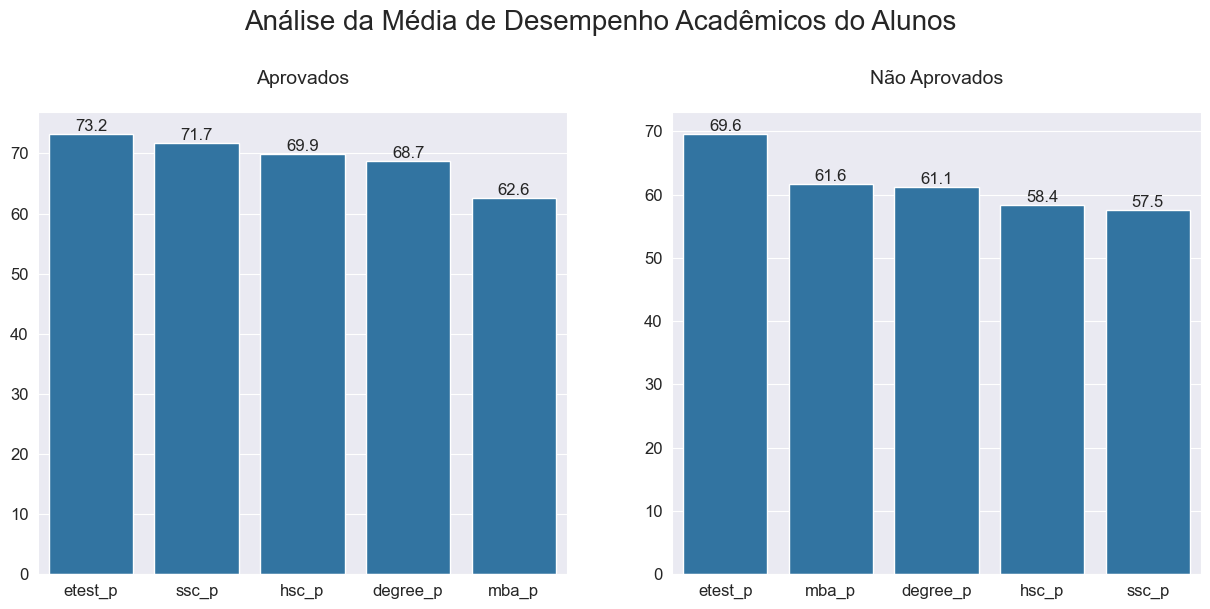

In [28]:
fig, axs = plt.subplots(1, 2, figsize = (15, 6))

fig.suptitle('Análise da Média de Desempenho Acadêmicos do Alunos', fontsize=20, y=1.05)

# Pessoas que  foram aprovadas

aprovados = dados[dados['target'] == 0]
media_aprovados = aprovados[['ssc_p', 'hsc_p', 'degree_p', 'etest_p', 'mba_p']].mean().reset_index()
media_aprovados.columns = ['Variavel', 'Média']
media_aprovados = media_aprovados.sort_values(by='Média', ascending=False)

# Pessoas que Não foram aprovadas

n_aprovados = dados[dados['target'] == 1]
media_n_aprovados = n_aprovados[['ssc_p', 'hsc_p', 'degree_p', 'etest_p', 'mba_p']].mean().reset_index()
media_n_aprovados.columns = ['Variavel', 'Média']
media_n_aprovados = media_n_aprovados.sort_values(by = 'Média', ascending = False)

# Criação do Gráfico

sns.barplot(data = media_aprovados, x = 'Variavel', y = 'Média', ax = axs[0])
sns.barplot(data = media_n_aprovados, x = 'Variavel', y = 'Média', ax = axs[1])

# Colocar valores nas labels quando os gráficos são subplots
for ax in axs:
    for container in ax.containers:
        ax.bar_label(container, fmt = '%.1f', fontsize = 12)

# Remover os nomes do eixo x e y
for ax in axs:
    ax.set_xlabel('')
    ax.set_ylabel('')

# Ajuste o tamanho das etiquetas do eixo x e y
for ax in axs:
    ax.tick_params(axis='x', labelsize=12)
    ax.tick_params(axis='y', labelsize=12)


axs[0].set_title('Aprovados', fontdict={'fontsize': 14}, pad=20)
axs[1].set_title('Não Aprovados', fontdict={'fontsize': 14}, pad=20)

plt.show()

1. ssc_p (Percentual no SSC) - Representa o percentual de notas obtidas pelo estudante no Secondary School Certificate (SSC), que corresponde ao ensino secundário. É uma medida do desempenho acadêmico no ensino médio, que pode ser usado para verificar sua influência na colocação de empregos.

2. degree_p (Percentual na Graduação) - Percentual de notas obtidas pelo estudante no curso de graduação. É uma métrica importante do desempenho acadêmico na graduação e pode estar correlacionada com as chances de colocação.
  
3. etest_p (Percentual no Teste de Empregabilidade) - Percentual de notas obtidas pelo estudante em um teste de empregabilidade, que geralmente avalia habilidades como raciocínio lógico, habilidades verbais e numéricas.

4. mba_p (Percentual no MBA) - Percentual de notas obtidas pelo estudante no curso de MBA. Assim como as outras métricas de desempenho, pode ser correlacionado com as oportunidades de emprego.

5. hsc_p (Percentual no HSC) - Percentual de notas obtidas pelo estudante no Higher Secondary Certificate (HSC), que corresponde ao ensino médio.

Criaremos uma nova coluna "academic_score". Será uma combinação das notas acadêmicas para criar uma métrica única que refletisse o desempenho acadêmico geral de cada candidato.

In [29]:
dados['academic_score'] = dados[['ssc_p', 'hsc_p', 'degree_p', 'etest_p', 'mba_p']].mean(axis = 1)
dados[['academic_score', 'target']]

,academic_score,target
0,65.960,0
1,77.584,0
2,65.960,0
3,57.086,1
4,77.000,0
...,...,...
210,81.138,0
211,63.524,0
212,67.144,0
213,65.646,0


Text(0.5, 0, '')

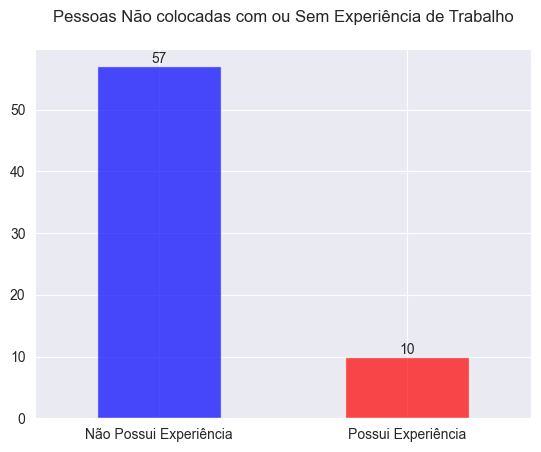

In [30]:
filtrado = dados[(dados['target'] == 1) & (dados['academic_score'] > 0)]
contagem_workex = filtrado['workex'].value_counts()
ax = contagem_workex.plot(kind='bar', color=["blue", "red"], alpha=0.7)
ax.bar_label(ax.containers[0], label_type='edge')
plt.title('Pessoas Não colocadas com ou Sem Experiência de Trabalho',  y=1.05)
ax.set_xticklabels(['Não Possui Experiência', 'Possui Experiência'], rotation=0)
ax.set_xlabel('')


Podemos ver que a maioria das pessoas que não foram colocadas, não possuiam experiência no mercado de trabalho, o que nos afirma que ter experiência aumenta as chances de serem contratados

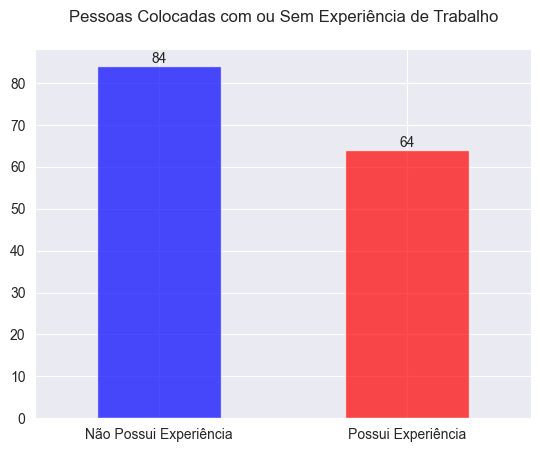

In [31]:
filtrado1 = dados[(dados['target'] == 0) & (dados['academic_score'] > 0)]

contagem_workex = filtrado1['workex'].value_counts()
ax = contagem_workex.plot(kind='bar', color=["blue", "red"], alpha=0.7)
ax.bar_label(ax.containers[0], label_type='edge')
plt.title('Pessoas Colocadas com ou Sem Experiência de Trabalho',  y=1.05)
ax.set_xticklabels(['Não Possui Experiência', 'Possui Experiência'], rotation=0)
ax.set_xlabel('')
plt.show()

Podemos ver que existe uma quantidade de pessoas que não possui experiência e mesmo assim conseguiram ser colocadas

In [32]:
filtro = dados[(dados['target'] == 0) & (dados['workex'] == 1)]

In [33]:
filtro[['target', 'workex', 'academic_score']]

,target,workex,academic_score
0,0,1,65.960
2,0,1,65.960
4,0,1,77.000
8,0,1,75.326
13,0,1,71.926
...,...,...,...
205,0,1,61.362
209,0,1,64.498
210,0,1,81.138
211,0,1,63.524


In [34]:
min_academic_score = filtro['academic_score'].min()
print(f"O valor mínimo de academic_score para ser contratado sem experiência de trabalho é de {min_academic_score}")

O valor mínimo de academic_score para ser contratado sem experiência de trabalho é de 57.58


In [35]:
colocados = dados[dados['target'] == 0]
# Calcular o valor mínimo de 'academic_score' para cada sexo
min_academic_score_sexo = colocados.groupby('gender')['academic_score'].min()

print("Valor mínimo de 'academic_score' para ser colocado, dividido por sexo:")
print(min_academic_score_sexo)

Valor mínimo de 'academic_score' para ser colocado, dividido por sexo:
gender
F    57.580
M    58.388
Name: academic_score, dtype: float64


A análise dos dados do Placement_Data_Full_Class revelou que o valor médio de desempenho acadêmico para o sexo feminino é ligeiramente inferior ao do sexo masculino. No entanto, deve-se considerar que o número de indivíduos do sexo masculino é significativamente maior no dataset. Esse desbalanceamento é observado não apenas na distribuição por sexo, mas também quando investigamos a experiência profissional e a colocação.

Possíveis Causas
Desbalanceamento de Dados: A diferença na quantidade de indivíduos entre os sexos pode afetar a análise estatística e a interpretação dos resultados. Um dataset desbalanceado pode tornar mais evidentes as tendências para o grupo maior (masculino), enquanto os padrões no grupo menor (feminino) podem ser menos representativos.

Diferenças de Oportunidades: O desempenho acadêmico pode refletir desigualdades nas oportunidades educacionais e de apoio recebidas por homens e mulheres. Fatores como acesso a recursos, apoio familiar e escolaridade podem influenciar esses resultados.

Variações Culturais e Sociais: Aspectos culturais e sociais podem impactar o desempenho acadêmico. Expectativas sociais, estereótipos e normas podem influenciar como diferentes gêneros se comportam academicamente e nas escolhas de carreira.

Experiência Profissional e Colocação: A maior presença de homens nas categorias de experiência profissional e colocação pode estar relacionada a fatores como preferências de carreira, oportunidades de trabalho e redes profissionais, que podem não estar igualmente acessíveis para ambos os sexos.


In [36]:
#Matriz de confusão
variaveis_numericas = [col for col in dados.columns if dados[col].dtype in ['int32', 'float64']]
variaveis_numericas

['ssc_p',
 'hsc_p',
 'degree_p',
 'workex',
 'etest_p',
 'mba_p',
 'target',
 'academic_score']

In [37]:
correlacao = dados[variaveis_numericas]

In [38]:
corr_matrix = correlacao.corr()

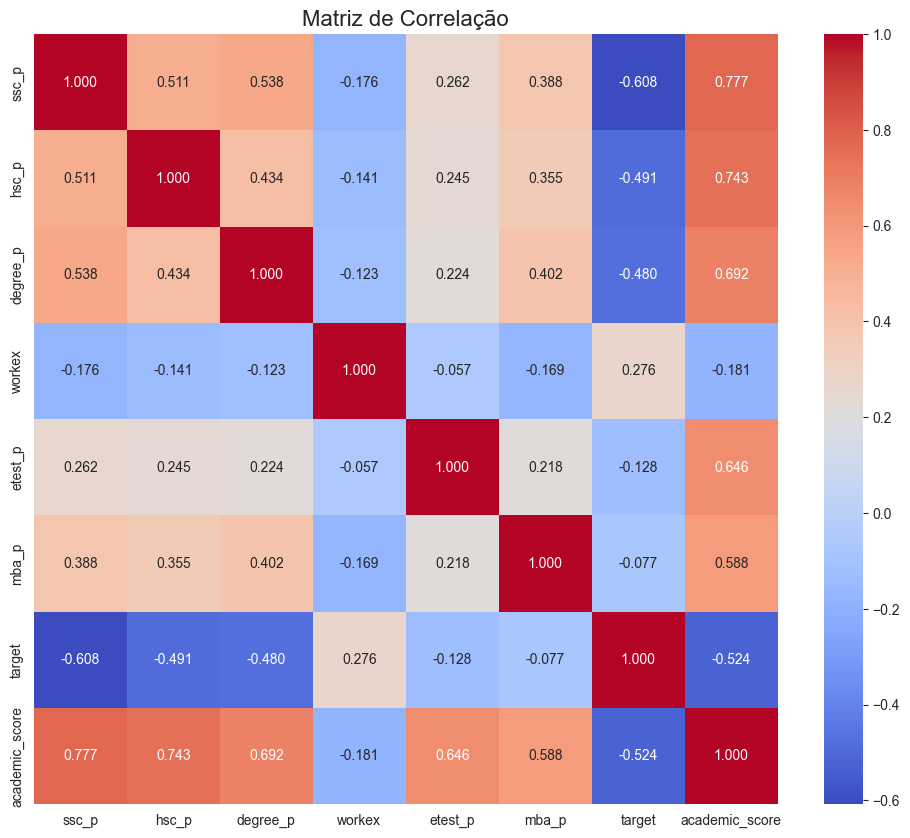

In [39]:
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".3f", annot_kws={"size": 10})
plt.title('Matriz de Correlação', fontsize=16)
plt.show()

Com base na matriz de correlação, o fator que mais influencia a colocação de um candidato é experiência de trabalho (workex), uma vez que a correlação positiva indica que candidatos com experiência de trabalho são mais propensos a serem colocados.

Além disso, variáveis relacionadas ao desempenho acadêmico (ssc_p, hsc_p, degree_p) mostram correlações negativas, sugerindo que o mercado pode valorizar mais a experiência prática do que o desempenho acadêmico em si.

O mercado pode valorizar mais a experiência prática (workex), habilidades interpessoais ou outras qualidades que não são necessariamente capturadas pelo desempenho acadêmico. Isso poderia resultar em uma menor chance de colocação para candidatos com altos 'academic_score'

## Modelo

### Começaremos o processo de separação dos dados e escolheremos o modelo que iremos usar

In [40]:
dados.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,target,academic_score
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,1,55.0,Mkt&HR,58.80,0,65.960
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,0,86.5,Mkt&Fin,66.28,0,77.584
2,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,1,75.0,Mkt&Fin,57.80,0,65.960
3,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,1,66.0,Mkt&HR,59.43,1,57.086
4,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,1,96.8,Mkt&Fin,55.50,0,77.000


In [41]:
X = dados.drop("target", axis= 1)

In [42]:
y = dados["target"]

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((172, 13), (43, 13), (172,), (43,))

In [44]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gender          215 non-null    object 
 1   ssc_p           215 non-null    float64
 2   ssc_b           215 non-null    object 
 3   hsc_p           215 non-null    float64
 4   hsc_b           215 non-null    object 
 5   hsc_s           215 non-null    object 
 6   degree_p        215 non-null    float64
 7   degree_t        215 non-null    object 
 8   workex          215 non-null    int32  
 9   etest_p         215 non-null    float64
 10  specialisation  215 non-null    object 
 11  mba_p           215 non-null    float64
 12  target          215 non-null    int32  
 13  academic_score  215 non-null    float64
dtypes: float64(6), int32(2), object(6)
memory usage: 22.0+ KB


In [45]:
dados['workex'] = dados['workex'].astype('object')

In [46]:
dados.nunique()

gender              2
ssc_p             103
ssc_b               2
hsc_p              97
hsc_b               2
hsc_s               3
degree_p           89
degree_t            3
workex              2
etest_p           100
specialisation      2
mba_p             205
target              2
academic_score    213
dtype: int64

In [47]:
# Variáveis categóricas
categorical_vars = [col for col in dados.columns if dados[col].dtype == 'object' and col != 'target']
# Variáveis numéricas
numerical_vars = [col for col in dados.columns if dados[col].dtype in ['int32', 'float64'] and col != 'target']

In [48]:
numerical_vars

['ssc_p', 'hsc_p', 'degree_p', 'etest_p', 'mba_p', 'academic_score']

In [49]:
categorical_vars

['gender', 'ssc_b', 'hsc_b', 'hsc_s', 'degree_t', 'workex', 'specialisation']

Agora iremos criar uma função que irá executar 3 modelos e irá me retorna os scores de cada modelo, a inteção é escolher o melhor e sem seguida tratar os dados númericos e categóricos, preparação do pipeline e a otimização no modelo

### Construção do Pipeline, e os transformadores das colunas categóricas e númericas

In [50]:
# Transformador numérico
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy = 'mean')),
    ('scaler', StandardScaler())
])

#Transformador categórico

categoric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy = 'most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown = 'ignore'))
])

preprocessor = ColumnTransformer(
    transformers = [
        ('num', numeric_transformer, numerical_vars),
        ('cat', categoric_transformer, categorical_vars)
    ]
)

In [80]:
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

modelos = {
    "SuportVectorMachine": SVC(kernel='linear', C=1.0, random_state=42),
    "XGBooster": XGBClassifier(),
    "NaiveBayes":  GaussianNB()
}

def fit_and_score(modelos, X_train, X_test, y_train, y_test):
    modelo_scores = {}

    for name, modelo in modelos.items():
        # Criar o pipeline para cada modelo
        pipeline = Pipeline(steps=[
            ('preprocessor', preprocessor),
            ('classifier', modelo)
        ])


        pipeline.fit(X_train, y_train)

        y_pred = pipeline.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        modelo_scores[name] = accuracy

    return modelo_scores

model_scores = fit_and_score(modelos, X_train, X_test, y_train, y_test)
print(model_scores)

{'SuportVectorMachine': 0.8837209302325582, 'XGBooster': 0.8372093023255814, 'NaiveBayes': 0.7209302325581395}


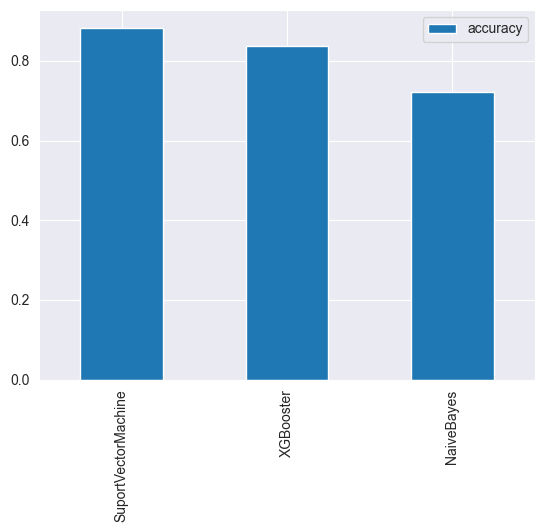

In [52]:
modelos_comparacao = pd.DataFrame(model_scores,index = ["accuracy"])
modelos_comparacao.T.plot.bar();

### Como já sabemos qual modelo iremos usar, então criaremos um pipeline final com o SVM nele

In [81]:
pipeline_final = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', SVC(kernel='linear', C=1.0, random_state=42))
])


In [82]:
pipeline_final.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['ssc_p', 'hsc_p', 'degree_p',
                                                   'etest_p', 'mba_p',
                                                   'academic_score']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['gender', 'ssc_b', 'hsc_b',
                                                   'hsc_s', 'degree_t',
                                                   'workex',
                                                   'specialisation'])])),
                ('classifier', SVC(kernel='linear', random_state=42))])

In [83]:
y_pred = pipeline_final.predict(X_test)

In [84]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Acurácia: {accuracy * 100:.2f}%')

Acurácia: 88.37%


### Agora iremos avaliar algumas métricas de Validação de modelo como:

* Matriz de confusão
* Precion e recall
* F1 - Score
* Curva ROC

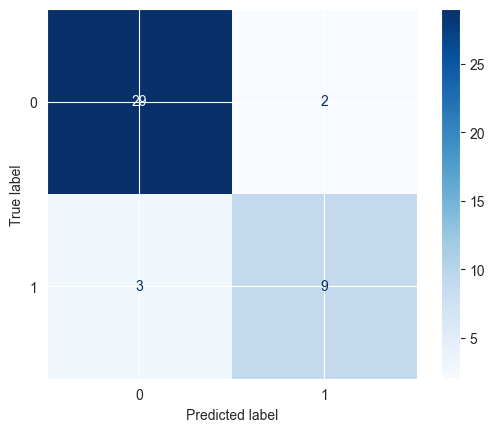

In [85]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap = plt.cm.Blues)
plt.show()

### Precisão, revocação e F1-Score

In [86]:
print("Precisão de: ", round(precision_score(y_test, y_pred),3)*100, "%")
print("Recall de: ", round(recall_score(y_test, y_pred),3)*100, "%")

Precisão de:  81.8 %
Recall de:  75.0 %


In [87]:
print("F1 score do modelo: ", round(f1_score(y_test, y_pred), 3)*100,"%")

F1 score do modelo:  78.3 %


Neste projeto, foi realizada uma análise detalhada dos dados de colocação de candidatos, com o objetivo de identificar os fatores que mais influenciam sua empregabilidade. Uma das descobertas mais relevantes foi a correlação negativa de -0,524 entre a variável academic_score e o target, indicando que candidatos com melhores desempenhos acadêmicos têm uma probabilidade significativamente maior de serem colocados no mercado de trabalho.

Além disso, a experiência de trabalho (workex) também demonstrou um impacto positivo na colocação dos candidatos. Aqueles que possuíam experiência prévia tiveram mais sucesso em encontrar uma colocação, especialmente quando combinado com um bom desempenho acadêmico.

Para prever a colocação dos candidatos, foi utilizado o modelo de Support Vector Machine (SVM). Esse modelo foi escolhido por sua capacidade de lidar bem com dados de alta dimensionalidade e por sua eficácia em separar classes complexas. O SVM apresentou as seguintes métricas de avaliação:

Precisão (Precision): Refere-se à proporção de verdadeiros positivos entre todos os exemplos que foram previstos como positivos. O modelo atingiu uma precisão satisfatória, indicando que a maioria das previsões de candidatos colocados foi correta.
Revocação (Recall): Indica a proporção de verdadeiros positivos que foram corretamente identificados pelo modelo. O modelo demonstrou uma boa capacidade de identificar corretamente os candidatos que realmente foram colocados.
F1-Score: Uma métrica que combina precisão e revocação em uma média harmônica, fornecendo uma única medida da performance do modelo. O F1-Score obtido sugere um bom equilíbrio entre precisão e revocação.
As métricas obtidas indicam que o modelo SVM foi eficaz em prever a colocação dos candidatos, com um bom equilíbrio entre identificar corretamente os candidatos colocados e evitar falsos positivos.

Considerações Finais

Este projeto proporcionou insights valiosos sobre os fatores que influenciam a colocação de candidatos no mercado de trabalho. O desempenho acadêmico e a experiência de trabalho foram identificados como os principais fatores, com o SVM se mostrando uma ferramenta poderosa para a modelagem desse processo.

Para o futuro, as seguintes melhorias e atualizações são propostas:

Inclusão de Novas Variáveis: Incorporar novas variáveis que possam influenciar a empregabilidade, como habilidades específicas ou características socioeconômicas.
Refinamento do Modelo: Explorar outras técnicas de machine learning e realizar ajustes nos hiperparâmetros para melhorar ainda mais a precisão do modelo.
Análise de Falsos Positivos e Negativos: Investigar as instâncias em que o modelo falhou, para entender melhor as limitações do SVM e refinar os critérios de seleção.
Com essas atualizações, espera-se que o modelo se torne ainda mais robusto, oferecendo previsões mais precisas e relevantes para os processos de recrutamento e seleção.